In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


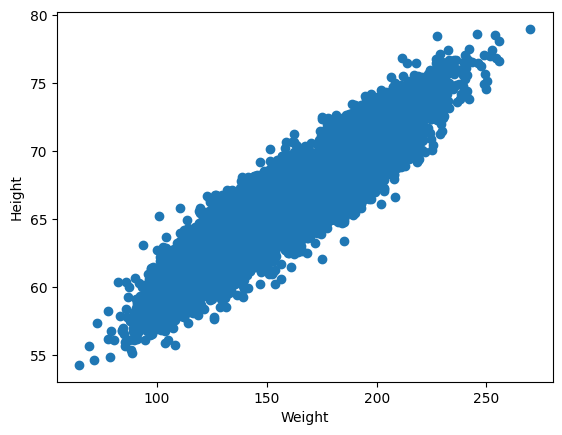

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [4]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [5]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


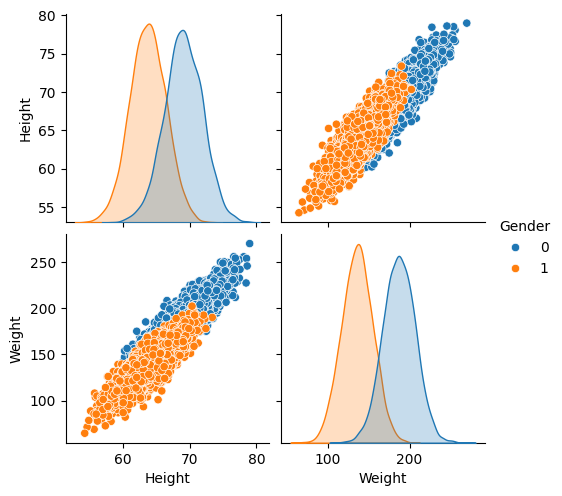

In [6]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='Gender')
plt.show()

In [7]:
X = df[['Weight']]
y = df['Height']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalar = StandardScaler()
X_train_std = scalar.fit_transform(X_train)

In [11]:
X_train_std 

array([[-0.04659659],
       [ 1.34251968],
       [-0.34628208],
       ...,
       [-0.13835268],
       [ 0.56699643],
       [-0.33884025]])

In [12]:
X_test_std = scalar.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression


In [14]:
reg=LinearRegression()

In [15]:
reg.fit(X_train_std,y_train)

LinearRegression()

In [16]:
print("Slope: ", reg.coef_[0])
print("Intercept: ", reg.intercept_)

Slope:  3.5520765037421533
Intercept:  66.34834766149207


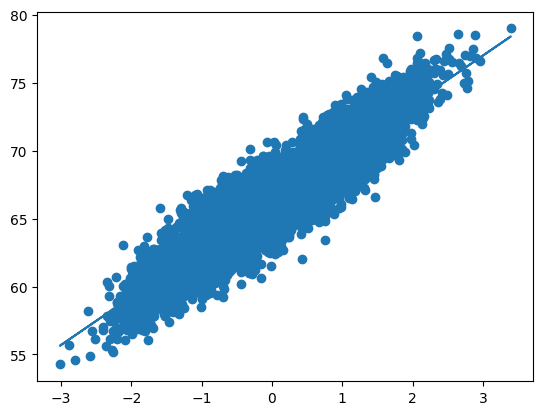

In [17]:
plt.scatter(X_train_std ,y_train)
plt.plot(X_train_std,reg.predict(X_train_std))
plt.show()

In [18]:
y_pred = reg.predict(X_test_std)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [20]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  2.1245002931280457
mae:  1.1618686241050298
rmse:  1.4575665655907608


In [21]:
from sklearn.metrics import r2_score

In [22]:
score = r2_score(y_test,y_pred)

In [23]:
score

0.857428881104187

In [24]:
1 - (((1-score)*(len(y_test)-1))/ (len(y_test)-X_test.shape[1]-1))

0.8573718069973433

In [25]:
import statsmodels.api as sm

In [27]:
model=sm.OLS(y_train,X_train_std).fit()

In [28]:
prediction = model.predict(X_test_std)

In [30]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Sun, 06 Oct 2024   Prob (F-statistic):                    3.63e-06
Time:                        23:04:35   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [32]:
reg.predict(scalar.transform([[72]]))

/Users/deva/Data/Learning/NLP/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.45016021])